## КМ2

1) Сформируйте матрицу размером 20 строк, 5 столбцов, заполненную случайными равномерно распределенными числами на отрезке [0,1]. Выполните ее сингулярное разложение. Восстановите матрицу, удерживая 5, 3, 2 сингулярных числа. Для всех трех случаев вычислите максимальную по абсолютному значению разность элементов исходной и восстановленных матриц. Сопоставьте их между собой.<br>
2) Вторая производная на массивах x, y выглядит следующим образом: $\frac{dy}{dx} = \frac{y_{i+1} - 2y_i + y_{i-1}}{x_{i+1}-x_{i-1}}$ .Написать функцию, которой передаются эти массивы, функция возвращает массив со второй производной. Подумать над размерностью этого массива. Сделать все без циклов средствами NumPy. Вычислить вторую производную функции sin(x) на отрезке [0,2𝜋]. Постройте график.

### Задание 1

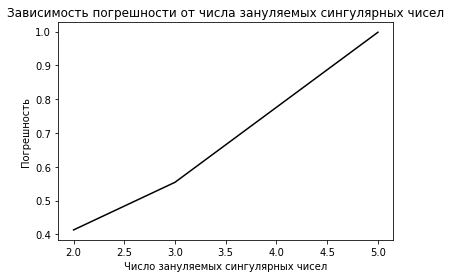

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


def gen_matrix(m, n, a, b):
    return np.random.uniform(a, b, (m, n))


def restore(U, s, VT):
    Sigma = np.zeros((U.shape[0], VT.shape[0]))
    for i in range(min((U.shape[0], VT.shape[0]))):
        Sigma[i, i] = s[i]
    return U @ Sigma @ VT


def main():
    matrix = gen_matrix(20, 5, 0, 1)
    U, s, VT = la.svd(matrix)
    z_s = [2, 3, 5]
    errs = np.zeros(len(z_s))
    for i in range(len(z_s)):
        s[-z_s[i]:] = 0
        rest = restore(U, s, VT)
        errs[i] = np.max(np.abs(rest - matrix))
    plt.plot(z_s, errs, color='black')
    plt.title('Зависимость погрешности от числа зануляемых сингулярных чисел')
    plt.xlabel('Число зануляемых сингулярных чисел')
    plt.ylabel('Погрешность')
    plt.show()


main()

### Задание 2

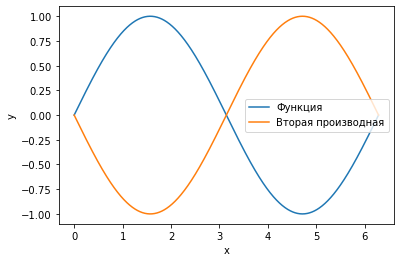

In [5]:
def func(x):
    return np.sin(x)


def get_derivative(x, y):
    res = np.zeros(len(x))
    i = np.array(range(1, len(x)-1))
    res[i] = (y[i+1] - 2*y[i] + y[i-1]) / ((x[i] - x[i-1])**2)
    return res


x = np.linspace(0, 2*np.pi, 1000)
y = func(x)
res = get_derivative(x, y)
plt.plot(x, y, label='Функция')
plt.plot(x, res, label='Вторая производная')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()